In [155]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [96]:
#データの読み込み
iris = load_iris()

In [97]:
#データの内容を確認
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [98]:
#irirをpandasで使えるようにする
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target_names[iris.target]

In [99]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


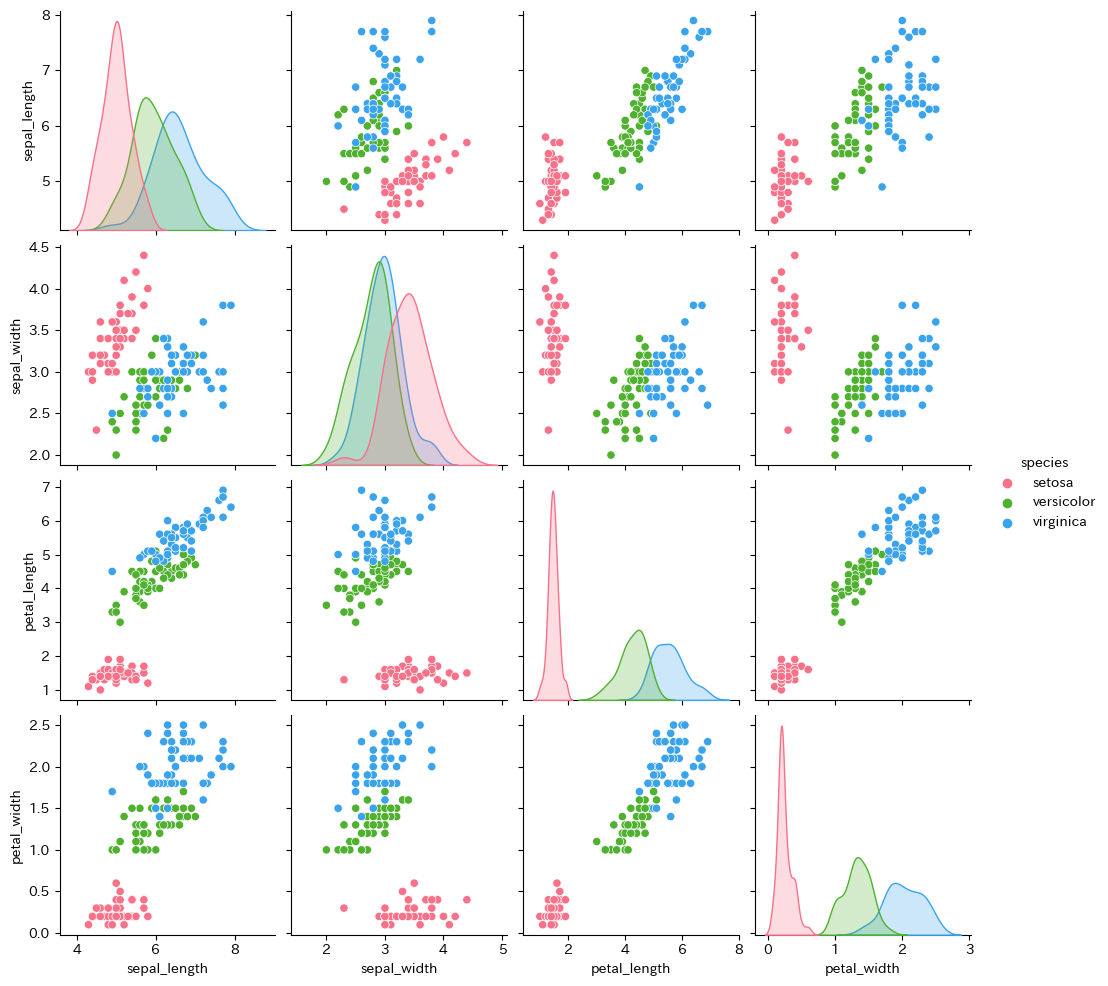

In [100]:
#seabornで可視化
iris_visible = sns.load_dataset("iris") #irisデータセットをpandasのDataFrameとして読み込む
sns.pairplot(iris_visible, hue="species", palette="husl").savefig("seaborn_iris.png")

In [135]:
#データを訓練用とテスト用に分割する
train, testX = train_test_split(df, test_size=0.3, random_state=0)

In [136]:
#訓練用データのtargetをyとして保存
y = train["target"]

#訓練用データのtarget以外をtrainXとして保存
trainX = train.iloc[:, 0:4]

In [137]:
#評価のためのデータとしてテスト用データのtargetを保存、ダミー化
valid_data = testX["target"]
valid_data = pd.get_dummies(valid_data)

#テスト用データのtargetを消去
testX = testX.drop(columns="target")

In [138]:
y.head()

60     versicolor
116     virginica
144     virginica
119     virginica
108     virginica
Name: target, dtype: object

In [139]:
valid_data.head()

,setosa,versicolor,virginica
114,0,0,1
62,0,1,0
33,1,0,0
107,0,0,1
7,1,0,0


In [140]:
trainX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [141]:
testX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [142]:
#ダミー化
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)
y = pd.get_dummies(y)

In [143]:
y.head()

,setosa,versicolor,virginica
60,0,1,0
116,0,0,1
144,0,0,1
119,0,0,1
108,0,0,1


In [144]:
#決定木のモデルの枠組みを作る
clf1 = DT()

In [145]:
#パラメーターの作成
parameters = {"max_depth":list(range(2, 11)), "min_samples_leaf":list(range(3, 21))}

In [146]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [147]:
#グリッドサーチ
gcv = GridSearchCV(clf1, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19, 20]},
             return_train_score=True, scoring='roc_auc')

In [148]:
#グリッドサーチの結果を見る
gcv.cv_results_

{'mean_fit_time': array([0.00267053, 0.00376477, 0.003196  , 0.00199056, 0.00256324,
        0.00186176, 0.00190344, 0.00168695, 0.00147204, 0.0014699 ,
        0.00133548, 0.00246143, 0.00250783, 0.00258675, 0.00232062,
        0.00237341, 0.00167198, 0.00204759, 0.00128498, 0.00314045,
        0.00301538, 0.0018188 , 0.00180564, 0.00179758, 0.00237412,
        0.00125504, 0.0028049 , 0.00163755, 0.00134215, 0.00249338,
        0.00176773, 0.00175681, 0.00252156, 0.00176988, 0.00173993,
        0.00182185, 0.00174713, 0.00177188, 0.00180511, 0.00225172,
        0.00237012, 0.00273066, 0.00148797, 0.0024272 , 0.00165954,
        0.00230393, 0.00212131, 0.0024416 , 0.00206294, 0.00173125,
        0.00163016, 0.00155649, 0.00154438, 0.00351543, 0.00179367,
        0.00124068, 0.00211768, 0.00125375, 0.00184631, 0.00170822,
        0.00178823, 0.00160685, 0.0024488 , 0.00193062, 0.00261145,
        0.00173154, 0.00305958, 0.00234485, 0.00168037, 0.00218024,
        0.001861  , 0.00202894,

In [149]:
#グリッドサーチの結果の中の特定のスコアを取得する
train_score = gcv.cv_results_["mean_train_score"]
test_score = gcv.cv_results_["mean_test_score"]

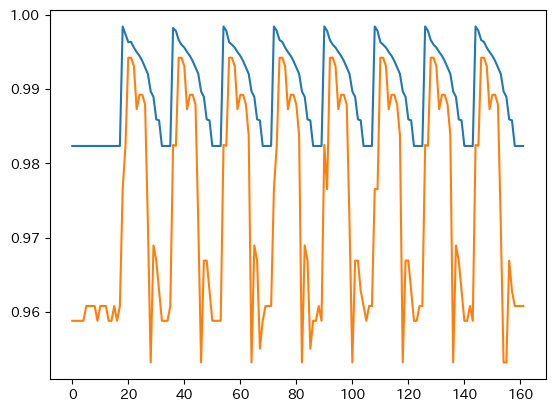

In [150]:
#描画
plt.plot(train_score)
plt.plot(test_score)

In [151]:
#最適なパラメータを取得
gcv.best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

In [152]:
#予測
pred = gcv.predict_proba(testX)

In [153]:
pred

[array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]),
 array([[0.88888889, 0.11111111],
        [0.        , 1.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.       

In [154]:
#評価関数に投入
mean_squared_error(valid_data, pred)

ValueError: Found input variables with inconsistent numbers of samples: [45, 3]

In [ ]:
#mseで評価する方法がわからない。
#データの読み込み方や分割方法も綺麗にしたい。